In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, Draw, Descriptors, MACCSkeys, rdFingerprintGenerator

<h3>Zdefiniowanie przykładowych cząsteczek</h3>

In [47]:
przykladowe_czasteczki = pd.DataFrame({
    "drug name": ["aspirin", "paracetamol", "pseudoefedrin", "sulfogaiacol"],
    "canonical_smiles": ["CC(=O)Oc1ccccc1C(=O)O", "CC(=O)Nc1ccc(cc1)O", "CNC(C(c1ccccc1)O)C", "OC1=CC=CC=C1OC.O=S([O-])(C)=O.[K+]"]
})

In [48]:
przykladowe_czasteczki

,drug name,canonical_smiles
0,aspirin,CC(=O)Oc1ccccc1C(=O)O
1,paracetamol,CC(=O)Nc1ccc(cc1)O
2,pseudoefedrin,CNC(C(c1ccccc1)O)C
3,sulfogaiacol,OC1=CC=CC=C1OC.O=S([O-])(C)=O.[K+]


<h3>Obliczenie fingerprintów MACCS</h3>

In [49]:
MACCS_fingerprints = {}
for _, drug in przykladowe_czasteczki.iterrows():
    MACCS_fingerprints[drug['drug name']] = MACCSkeys.rdMolDescriptors.GetMACCSKeysFingerprint(Chem.MolFromSmiles(drug['canonical_smiles']))  #[x for x in MACCSkeys.rdMolDescriptors.GetMACCSKeysFingerprint(Chem.MolFromSmiles(przykladowe_czasteczki['canonical_smiles'][0]))]

# MACCS_fingerprints = pd.DataFrame(MACCS_fingerprints)

In [50]:
MACCS_fingerprints

{'aspirin': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d3195b0>,
 'paracetamol': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319690>,
 'pseudoefedrin': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319700>,
 'sulfogaiacol': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319770>}

<h3>Obliczenie fingerprintów Morgan</h3>

In [51]:
Morgan_fingerprints = {}
Morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
for _, drug in przykladowe_czasteczki.iterrows():
    Morgan_fingerprints[drug['drug name']] = Morgan_generator.GetFingerprint(
        mol=Chem.MolFromSmiles(drug['canonical_smiles'])) #[x for x in Morgan_generator.GetFingerprint(mol=Chem.MolFromSmiles(przykladowe_czasteczki['canonical_smiles'][0]))]

#Morgan_fingerprints = pd.DataFrame(Morgan_fingerprints)

In [52]:
Morgan_fingerprints

{'aspirin': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d3199a0>,
 'paracetamol': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319a10>,
 'pseudoefedrin': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319a80>,
 'sulfogaiacol': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x766b7d319af0>}

<h3>Obliczenie indeksu podobieństwa Tanimoto dla 2 fingerprintów MACCS</h3>

In [53]:
DataStructs.TanimotoSimilarity(MACCS_fingerprints['aspirin'], MACCS_fingerprints['paracetamol'])

0.41935483870967744

<h3>Obliczenie indeksu podobieństwa Tanimoto pomiędzy 1. fingerprintem MACCS i resztą</h3>

In [54]:
MACCS_tanimoto = DataStructs.cDataStructs.BulkTanimotoSimilarity(MACCS_fingerprints['aspirin'], list(MACCS_fingerprints.values())[1:])
MACCS_tanimoto

[0.41935483870967744, 0.26666666666666666, 0.4]

<h3>Obliczenie indeksu podobieństwa Tanimoto dla 2 fingerprintów Morgan</h3>

In [55]:
DataStructs.TanimotoSimilarity(Morgan_fingerprints['aspirin'], Morgan_fingerprints['paracetamol'])

0.2222222222222222

<h3>Obliczenie indeksu podobieństwa Tanimoto pomiędzy 1. fingerprintem Morgan i resztą</h3>

In [56]:
Morgan_tanimoto = DataStructs.cDataStructs.BulkTanimotoSimilarity(Morgan_fingerprints['aspirin'], list(Morgan_fingerprints.values())[1:])
Morgan_tanimoto

[0.2222222222222222, 0.21052631578947367, 0.28205128205128205]

In [57]:
import seaborn as sns
sns.set_style("darkgrid")

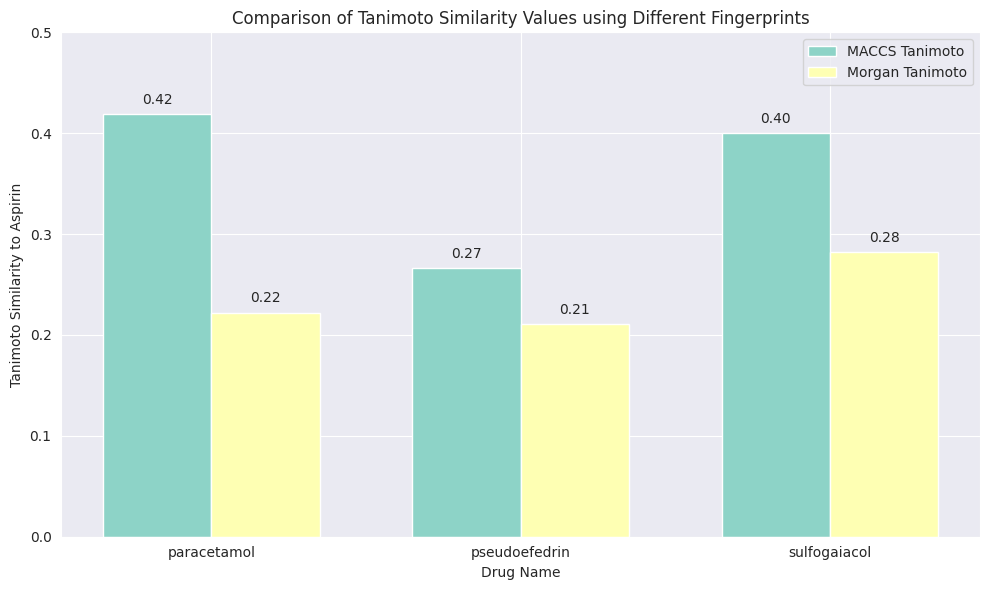

In [58]:
# Create a bar plot to compare Morgan and MACCS Tanimoto similarities
fig, ax = plt.subplots(figsize=(10, 6))

# Get drug names (excluding aspirin which is the reference)
drug_names = list(MACCS_fingerprints.keys())[1:]

# Set width of bars
width = 0.35

# Set positions of bars on X axis
x = np.arange(len(drug_names))

# Create bars
ax.bar(x - width/2, MACCS_tanimoto, width, label='MACCS Tanimoto')
ax.bar(x + width/2, Morgan_tanimoto, width, label='Morgan Tanimoto')

# Add labels, title and legend
ax.set_xlabel('Drug Name')
ax.set_ylabel('Tanimoto Similarity to Aspirin')
ax.set_title('Comparison of Tanimoto Similarity Values using Different Fingerprints')
ax.set_xticks(x)
ax.set_xticklabels(drug_names)
ax.legend()
ax.set_ylim(0, 0.5)  # Set y-axis range based on data

# Add value labels on top of each bar
for i, v in enumerate(MACCS_tanimoto):
    ax.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center')
    
for i, v in enumerate(Morgan_tanimoto):
    ax.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

<h3>Obliczenie indeksu podobieństwa Dice dla 2 fingerprintów MACCS</h3>

In [59]:
DataStructs.DiceSimilarity(MACCS_fingerprints['aspirin'], MACCS_fingerprints['paracetamol'])

0.5909090909090909

<h3>Obliczenie indeksu podobieństwa Dice pomiędzy 1. fingerprintem MACCS i resztą</h3>

In [60]:
MACCS_dice = DataStructs.cDataStructs.BulkDiceSimilarity(MACCS_fingerprints['aspirin'], list(MACCS_fingerprints.values())[1:])
MACCS_dice

[0.5909090909090909, 0.42105263157894735, 0.5714285714285714]

<h3>Obliczenie indeksu podobieństwa Dice dla 2 fingerprintów Morgan</h3>

In [61]:
DataStructs.DiceSimilarity(Morgan_fingerprints['aspirin'], Morgan_fingerprints['paracetamol'])

0.36363636363636365

<h3>Obliczenie indeksu podobieństwa Dice pomiędzy 1. fingerprintem Morgan i resztą</h3>

In [62]:
Morgan_dice = DataStructs.cDataStructs.BulkDiceSimilarity(Morgan_fingerprints['aspirin'], list(Morgan_fingerprints.values())[1:])
Morgan_dice

[0.36363636363636365, 0.34782608695652173, 0.44]

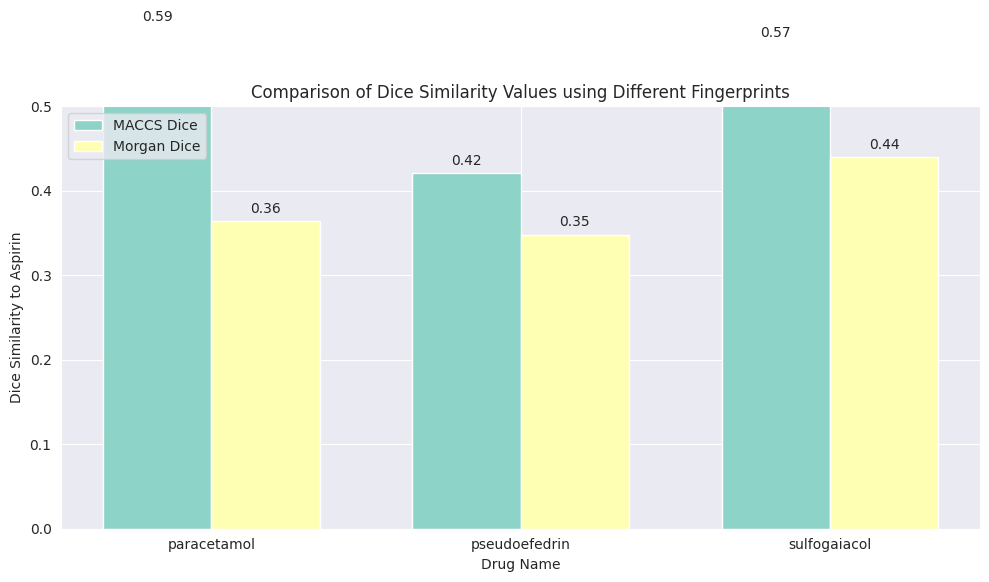

In [63]:
# Create a bar plot to compare Morgan and MACCS Tanimoto similarities
fig, ax = plt.subplots(figsize=(10, 6))

# Get drug names (excluding aspirin which is the reference)
drug_names = list(MACCS_fingerprints.keys())[1:]

# Set width of bars
width = 0.35

# Set positions of bars on X axis
x = np.arange(len(drug_names))

# Create bars
ax.bar(x - width/2, MACCS_dice, width, label='MACCS Dice')
ax.bar(x + width/2, Morgan_dice, width, label='Morgan Dice')

# Add labels, title and legend
ax.set_xlabel('Drug Name')
ax.set_ylabel('Dice Similarity to Aspirin')
ax.set_title('Comparison of Dice Similarity Values using Different Fingerprints')
ax.set_xticks(x)
ax.set_xticklabels(drug_names)
ax.legend()
ax.set_ylim(0, 0.5)  # Set y-axis range based on data

# Add value labels on top of each bar
for i, v in enumerate(MACCS_dice):
    ax.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center')
    
for i, v in enumerate(Morgan_dice):
    ax.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

<h3>Zaimportowanie zbioru danych przefiltrowanych zgodnie z regułą pięciu Lipinskiego z ćwiczenia 2</h3>

In [64]:
import os

In [65]:
EGFR_lipinski = pd.read_csv(os.path.join("..", "2_adme_lead-likeness", "EGFR_lipinski.csv"))

In [66]:
EGFR_lipinski.head()

,passed,Molecular mass,LogP,H-Donors,H-Acceptors,molecule_name,canonical_smiles,pIC50
0,True,383.814,4.45034,3,4,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,True,369.432,4.77200,1,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517
2,True,283.287,2.31056,2,4,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
3,True,370.456,5.58790,1,5,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,5.494850
4,True,442.515,5.07900,3,3,CHEMBL432941,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2C...,5.051587


In [67]:
gefitinib_smiles = "COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4"

In [68]:
gefitinib_mol = Chem.MolFromSmiles(gefitinib_smiles)

<h3>Wygenerowanie fingerprintów dla cząsteczki Gefityniby</h3>

In [69]:
MACCS_fingerprints["gefitinib"] = MACCSkeys.rdMolDescriptors.GetMACCSKeysFingerprint(gefitinib_mol)
Morgan_fingerprints['gefitinib'] = Morgan_generator.GetFingerprint(gefitinib_mol)

In [70]:
# Create a function to convert fingerprint bit vectors to lists
def convert_fingerprint_to_list(fp):
    return [int(fp.GetBit(i)) for i in range(fp.GetNumBits())]

# Create DataFrames for both fingerprint types
maccs_df = pd.DataFrame({
    drug: convert_fingerprint_to_list(fp) 
    for drug, fp in MACCS_fingerprints.items()
})

morgan_df = pd.DataFrame({
    drug: convert_fingerprint_to_list(fp)
    for drug, fp in Morgan_fingerprints.items()
})

# Create a combined dictionary with metadata about the fingerprints
fingerprints_dict = {
    "MACCS": maccs_df,
    "Morgan": morgan_df
}

# Save to CSV files
maccs_df.to_csv('maccs_fingerprints.csv', index=False)
morgan_df.to_csv('morgan_fingerprints.csv', index=False)

# Display the first few rows of each DataFrame
print("MACCS fingerprints shape:", maccs_df.shape)
print("Morgan fingerprints shape:", morgan_df.shape)

MACCS fingerprints shape: (167, 5)
Morgan fingerprints shape: (2048, 5)


In [71]:
morgan_df.head()

,aspirin,paracetamol,pseudoefedrin,sulfogaiacol,gefitinib
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [72]:
maccs_df.head()

,aspirin,paracetamol,pseudoefedrin,sulfogaiacol,gefitinib
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


<h3>Obliczenie podobieństwa Tanimoto pomiędzy Gefitynibem i wszystkimi cząsteczkami w zbiorze danych</h3>

In [73]:
gefitinib_taminoto_MACCS = DataStructs.cDataStructs.BulkTanimotoSimilarity(
    MACCS_fingerprints['gefitinib'],
    [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smiles)) for smiles in EGFR_lipinski['canonical_smiles']])

In [74]:
EGFR_lipinski.insert(EGFR_lipinski.shape[1],column="tanimoto_MACCS", value=gefitinib_taminoto_MACCS)

In [75]:
gefitinib_taminoto_Morgan = DataStructs.cDataStructs.BulkTanimotoSimilarity(
    Morgan_fingerprints['gefitinib'],
    [Morgan_generator.GetFingerprint(Chem.MolFromSmiles(smiles)) for smiles in EGFR_lipinski['canonical_smiles']])

In [76]:
EGFR_lipinski.insert(EGFR_lipinski.shape[1],column="tanimoto_Morgan", value=gefitinib_taminoto_Morgan)

In [77]:
gefitinib_dice_MACCS = DataStructs.cDataStructs.BulkDiceSimilarity(
    MACCS_fingerprints['gefitinib'],
    [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smiles)) for smiles in EGFR_lipinski['canonical_smiles']])

In [78]:
EGFR_lipinski.insert(EGFR_lipinski.shape[1],column="dice_MACCS", value=gefitinib_dice_MACCS)

In [79]:
gefitinib_dice_Morgan = DataStructs.cDataStructs.BulkDiceSimilarity(
    Morgan_fingerprints['gefitinib'],
    [Morgan_generator.GetFingerprint(Chem.MolFromSmiles(smiles)) for smiles in EGFR_lipinski['canonical_smiles']])

In [80]:
EGFR_lipinski.insert(EGFR_lipinski.shape[1],column="dice_Morgan", value=gefitinib_dice_Morgan)

In [81]:
EGFR_lipinski.head()

,passed,Molecular mass,LogP,H-Donors,H-Acceptors,molecule_name,canonical_smiles,pIC50,tanimoto_MACCS,tanimoto_Morgan,dice_MACCS,dice_Morgan
0,True,383.814,4.45034,3,4,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,0.472222,0.321839,0.641509,0.486957
1,True,369.432,4.77200,1,6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517,0.449275,0.182796,0.620000,0.309091
2,True,283.287,2.31056,2,4,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030,0.283784,0.091954,0.442105,0.168421
3,True,370.456,5.58790,1,5,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,5.494850,0.578125,0.105263,0.732673,0.190476
4,True,442.515,5.07900,3,3,CHEMBL432941,COc1cccc(-c2ccc3c(c2)NC(=O)/C3=C\c2[nH]c3c(c2C...,5.051587,0.474359,0.088496,0.643478,0.162602


In [82]:
EGFR_lipinski.to_csv("EGFR_lipinski_distances.csv", index=False)

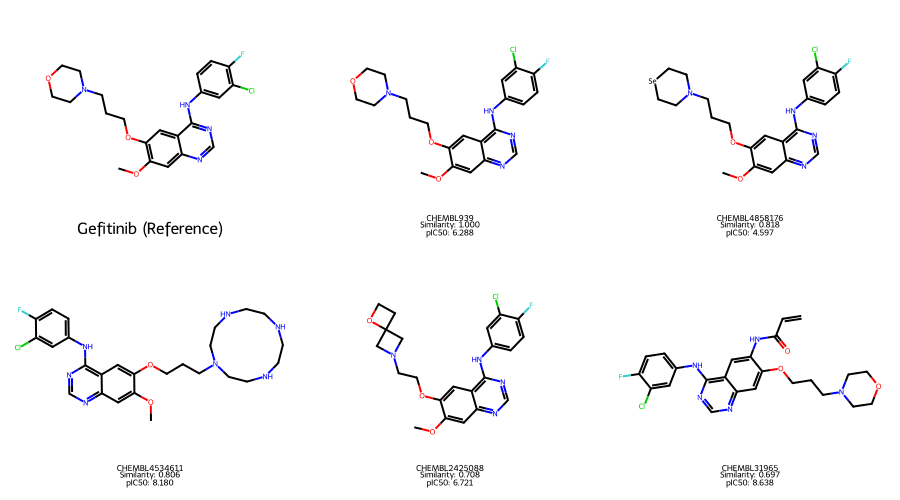

In [83]:
# Get top 5 molecules most similar to gefitinib based on Morgan fingerprint Tanimoto similarity
top5_tanimoto_morgan = EGFR_lipinski.sort_values('tanimoto_Morgan', ascending=False).head(5)

# Create a list of molecules from the top 5 similar compounds
mols = [Chem.MolFromSmiles(smiles) for smiles in top5_tanimoto_morgan['canonical_smiles']]

# Add the gefitinib molecule at the beginning for comparison
mols.insert(0, gefitinib_mol)
labels = ['Gefitinib (Reference)'] + list(top5_tanimoto_morgan['molecule_name'])
similarities = [''] + [f"Similarity: {sim:.3f}" for sim in top5_tanimoto_morgan['tanimoto_Morgan']]
pIC50s = [""] + [f"pIC50: {sim:.3f}" for sim in top5_tanimoto_morgan['pIC50']]

# Create a visualization grid
img = Draw.MolsToGridImage(
    mols, 
    molsPerRow=3, 
    subImgSize=(300, 250),
    legends=[f"{label}\n{sim}\n{pIC50}" for label, sim, pIC50 in zip(labels, similarities, pIC50s)],
    highlightAtomLists=None,
    useSVG=True
)

# Display the image
img

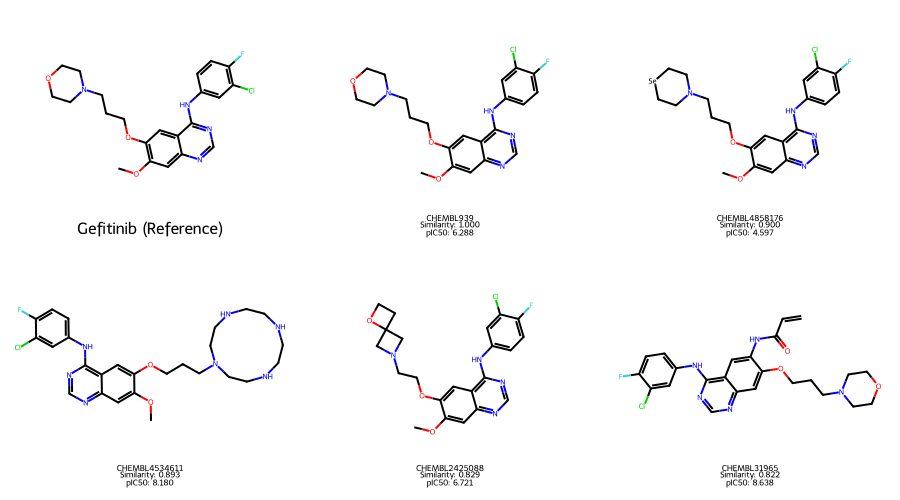

In [84]:
# Get top 5 molecules most similar to gefitinib based on Morgan fingerprint Tanimoto similarity
top5_dice_morgan = EGFR_lipinski.sort_values('dice_Morgan', ascending=False).head(5)

# Create a list of molecules from the top 5 similar compounds
mols = [Chem.MolFromSmiles(smiles) for smiles in top5_dice_morgan['canonical_smiles']]

# Add the gefitinib molecule at the beginning for comparison
mols.insert(0, gefitinib_mol)
labels = ['Gefitinib (Reference)'] + list(top5_dice_morgan['molecule_name'])
similarities = [''] + [f"Similarity: {sim:.3f}" for sim in top5_dice_morgan['dice_Morgan']]
pIC50s = [""] + [f"pIC50: {sim:.3f}" for sim in top5_dice_morgan['pIC50']]

# Create a visualization grid
img = Draw.MolsToGridImage(
    mols, 
    molsPerRow=3, 
    subImgSize=(300, 250),
    legends=[f"{label}\n{sim}\n{pIC50}" for label, sim, pIC50 in zip(labels, similarities, pIC50s)],
    highlightAtomLists=None,
    useSVG=True
)


# Display the image
img

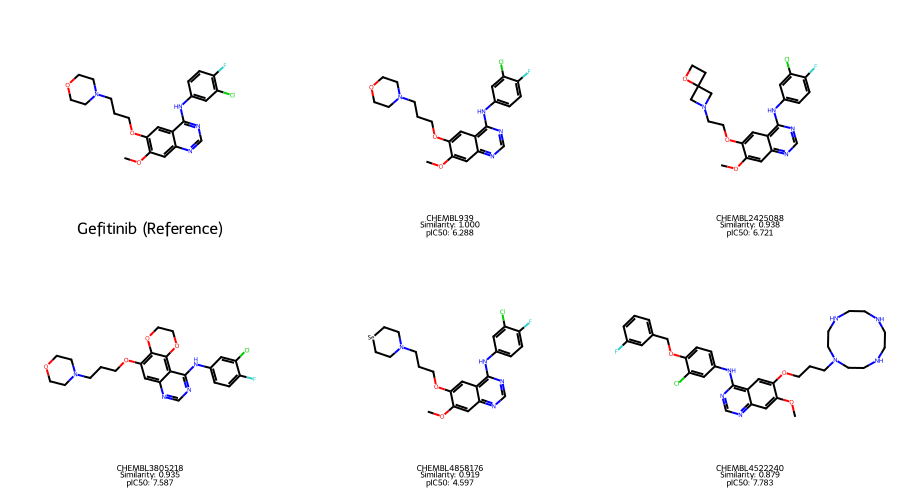

In [85]:
# Get top 5 molecules most similar to gefitinib based on MACCS fingerprint Tanimoto similarity
top5_tanimoto_MACCS = EGFR_lipinski.sort_values('tanimoto_MACCS', ascending=False).head(5)

# Create a list of molecules from the top 5 similar compounds
mols = [Chem.MolFromSmiles(smiles) for smiles in top5_tanimoto_MACCS['canonical_smiles']]

# Add the gefitinib molecule at the beginning for comparison
mols.insert(0, gefitinib_mol)
labels = ['Gefitinib (Reference)'] + list(top5_tanimoto_MACCS['molecule_name'])
similarities = [''] + [f"Similarity: {sim:.3f}" for sim in top5_tanimoto_MACCS['tanimoto_MACCS']]
pIC50s = [""] + [f"pIC50: {sim:.3f}" for sim in top5_tanimoto_MACCS['pIC50']]

# Create a visualization grid
img = Draw.MolsToGridImage(
    mols, 
    molsPerRow=3, 
    subImgSize=(300, 250),
    legends=[f"{label}\n{sim}\n{pIC50}" for label, sim, pIC50 in zip(labels, similarities, pIC50s)],
    highlightAtomLists=None,
    useSVG=True
)

# Display the image
img

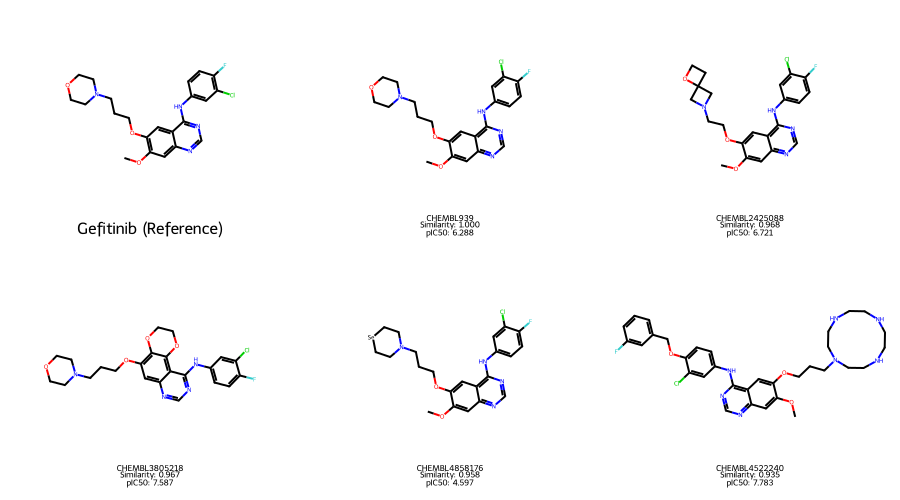

In [86]:
# Get top 5 molecules most similar to gefitinib based on MACCS fingerprint Tanimoto similarity
top5_dice_MACCS = EGFR_lipinski.sort_values('dice_MACCS', ascending=False).head(5)

# Create a list of molecules from the top 5 similar compounds
mols = [Chem.MolFromSmiles(smiles) for smiles in top5_dice_MACCS['canonical_smiles']]

# Add the gefitinib molecule at the beginning for comparison
mols.insert(0, gefitinib_mol)
labels = ['Gefitinib (Reference)'] + list(top5_dice_MACCS['molecule_name'])
similarities = [''] + [f"Similarity: {sim:.3f}" for sim in top5_dice_MACCS['dice_MACCS']]
pIC50s = [""] + [f"pIC50: {sim:.3f}" for sim in top5_dice_MACCS['pIC50']]

# Create a visualization grid
img = Draw.MolsToGridImage(
    mols, 
    molsPerRow=3, 
    subImgSize=(300, 250),
    legends=[f"{label}\n{sim}\n{pIC50}" for label, sim, pIC50 in zip(labels, similarities, pIC50s)],
    highlightAtomLists=None,
    useSVG=True
)


# Display the image
img